# Analisis predicciones para la fecha de definicion de La Liga 22/23

In [ ]:
import pandas as pd
import json

# Leer resultados de la fecha de definición de La Liga
partidos = pd.read_csv('la_liga_definicion.csv')

# Leer resultados predichos por el modelo
with open('estimacion_original_puntual_ganador.json') as data:
    prediccion = json.load(data)

def calcular_ganador(golesLocal, golesVisitante):
    if golesLocal > golesVisitante:
        return 'local'
    elif golesLocal < golesVisitante:
        return 'visitante'
    else:
        return 'empate'

# Iterar sobre las filas del DataFrame
for index, partido in partidos.iterrows():
    local = partido['Local']
    visitante = partido['Visitante']
    pred_partido = prediccion[local][visitante]

    p_local = pred_partido[0]
    p_empate = pred_partido[1]
    p_visitante = pred_partido[2]

    # Agregar resultado esperado
    partidos.at[index, 'expected_value'] = max(p_local, p_empate, p_visitante)

    # Agregar prediccion para cada resultado
    partidos.at[index, 'p_local'] = p_local
    partidos.at[index, 'p_empate'] = p_empate
    partidos.at[index, 'p_visitante'] = p_visitante

    # chequear si coinciden los resultados
    real = calcular_ganador(partido['goles_local'], partido['goles_visitante'])
    esperado = max(('local', p_local), ('empate', p_empate), ('visitante', p_visitante), key=lambda x: x[1])[0]
    partidos.at[index, 'Hit'] = 1 if real == esperado else 0


# Guardar los resultados en un nuevo archivo CSV
partidos.to_csv('resultados_fecha_definicion_original.csv', index=False)

# Analisis predicciones para toda la temporada

In [ ]:
temporada = 'resultados_temporada_xG_v2.csv'

In [ ]:
import pandas as pd
import json

# Leer resultados predichos por el modelo
partidos = pd.read_csv(temporada)

def calcular_ganador(golesLocal, golesVisitante):
    if golesLocal > golesVisitante:
        return 'local'
    elif golesLocal < golesVisitante:
        return 'visitante'
    else:
        return 'empate'

# Iterar sobre las filas del DataFrame
for index, partido in partidos.iterrows():
    local = partido['Local']
    visitante = partido['Visitante']

    p_local = partido['Prob_Local']
    p_empate = partido['Prob_Empate']
    p_visitante = partido['Prob_Visitante']

    # chequear si coinciden los resultados
    ganador = calcular_ganador(partido['goles_local'], partido['goles_visitante'])
    esperado = max(('local', p_local), ('empate', p_empate), ('visitante', p_visitante), key=lambda x: x[1])[0]
    partidos.at[index, 'Hit'] = 1 if ganador == esperado else 0
    partidos.at[index, 'Ganador'] = ganador

partidos.to_csv('comparacion_' + temporada, index=False)

# Análisis prediccion de xG

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import argparse

In [ ]:
file_path = 'predicciones_22_23_xG_ext.csv'

In [ ]:
def clean_data(data):
  # Drop rows with NaN in either "xG_local_pred" or "xG_visitante_pred"
  data = data.dropna(subset=["xG_local_pred", "xG_visitante_pred"])
  return data

In [ ]:
def calculate_MSE(file_path):
    # Load data from CSV file
    data = pd.read_csv(file_path)

    df = clean_data(data)

    mse_local = mean_squared_error(df['xG_local'], df['xG_local_pred'])
    mse_visitante = mean_squared_error(df['xG_visitante'], df['xG_visitante_pred'])

    print(f"Error Cuadratico Medio Local: {mse_local}")
    print(f"Error Cuadratico Medio visitante: {mse_visitante}")

calculate_MSE(file_path)

Error Cuadratico Medio Local: 0.3768511848868179
Error Cuadratico Medio visitante: 0.28513799322581174


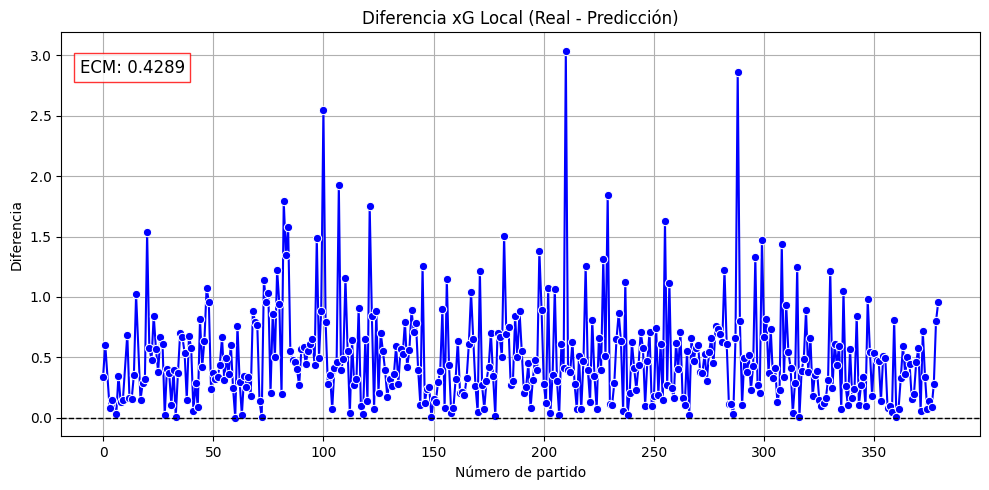

In [ ]:
df = pd.read_csv(file_path)
df = clean_data(df)

# Computar metricas
mse = mean_squared_error(df['xG_local'], df['xG_local_pred'])
df["diff_local"] = abs(df["xG_local"] - df["xG_local_pred"])

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=df.index, y=df["diff_local"], marker="o", color="blue", ax=ax)

ax.axhline(0, color="black", linestyle="--", linewidth=1)
ax.set_title("Diferencia xG Local (Real - Predicción)")
ax.set_ylabel("Diferencia")
ax.set_xlabel("Número de partido")
ax.grid(True)

ax.text(0.02, 0.90, f'ECM: {mse:.4f}', transform=ax.transAxes, fontsize=12, color="black",
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'))

plt.savefig("pred_xG_local.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


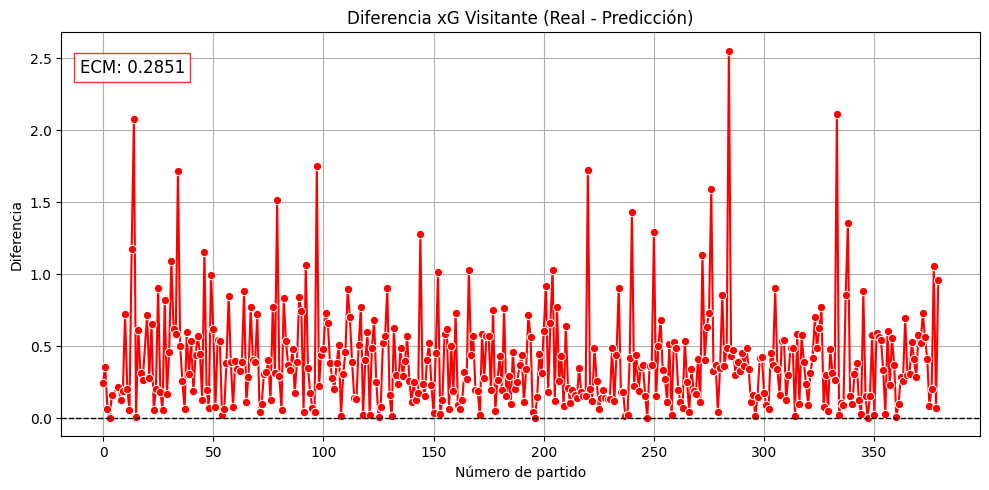

In [ ]:
df = pd.read_csv(file_path)
df = clean_data(df)

mse = mean_squared_error(df['xG_visitante'], df['xG_visitante_pred'])
df["diff_visitante"] = abs(df["xG_visitante"] - df["xG_visitante_pred"])

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=df.index, y=df["diff_visitante"], marker="o", color="red", ax=ax)
ax.axhline(0, color="black", linestyle="--", linewidth=1)
ax.set_title("Diferencia xG Visitante (Real - Predicción)")
ax.set_ylabel("Diferencia")
ax.set_xlabel("Número de partido")
ax.grid(True)

ax.text(0.02, 0.90, f'ECM: {mse:.4f}', transform=ax.transAxes, fontsize=12, color="black",
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'))

plt.savefig("pred_xG_visitante.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()